In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns
%matplotlib inline

In [2]:
cd ..

/Users/josephmchugh/code/flatiron_project_2/flatiron_mod2_project_kch


In [3]:
df = pd.read_csv('kc_cleaned.csv',index_col=0)

In [4]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'has_waterfront', 'has_basement',
       'has_renovation', 'eff_built'],
      dtype='object')

In [5]:
df['eff_age'] = 2020 - df['eff_built']

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


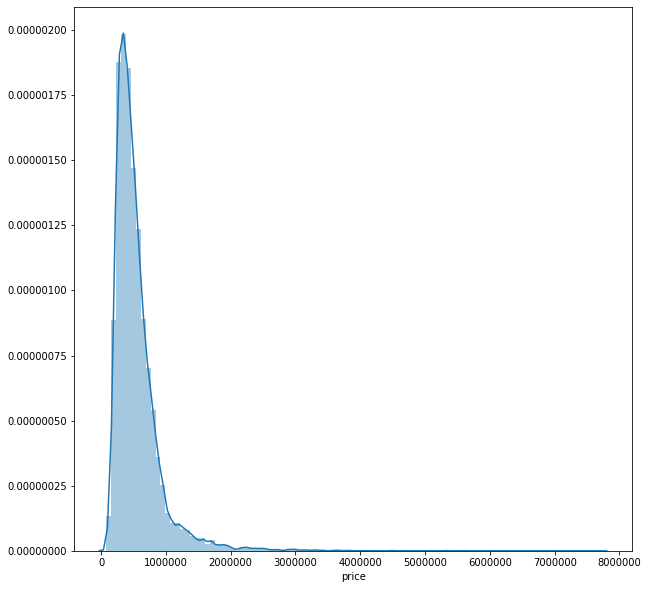

In [6]:
print(df['price'].describe())
plt.figure(figsize=(10,10))
sns.distplot(df['price'], bins=100)
plt.show()

In [7]:
#Identifying the distribution of the numerical data
list(set(df.dtypes))

[dtype('int64'), dtype('float64')]

In [8]:
df_num = df.select_dtypes(include = ['int64','float64'])
df_num = df_num.drop(columns = ['has_basement','has_renovation','has_waterfront'])

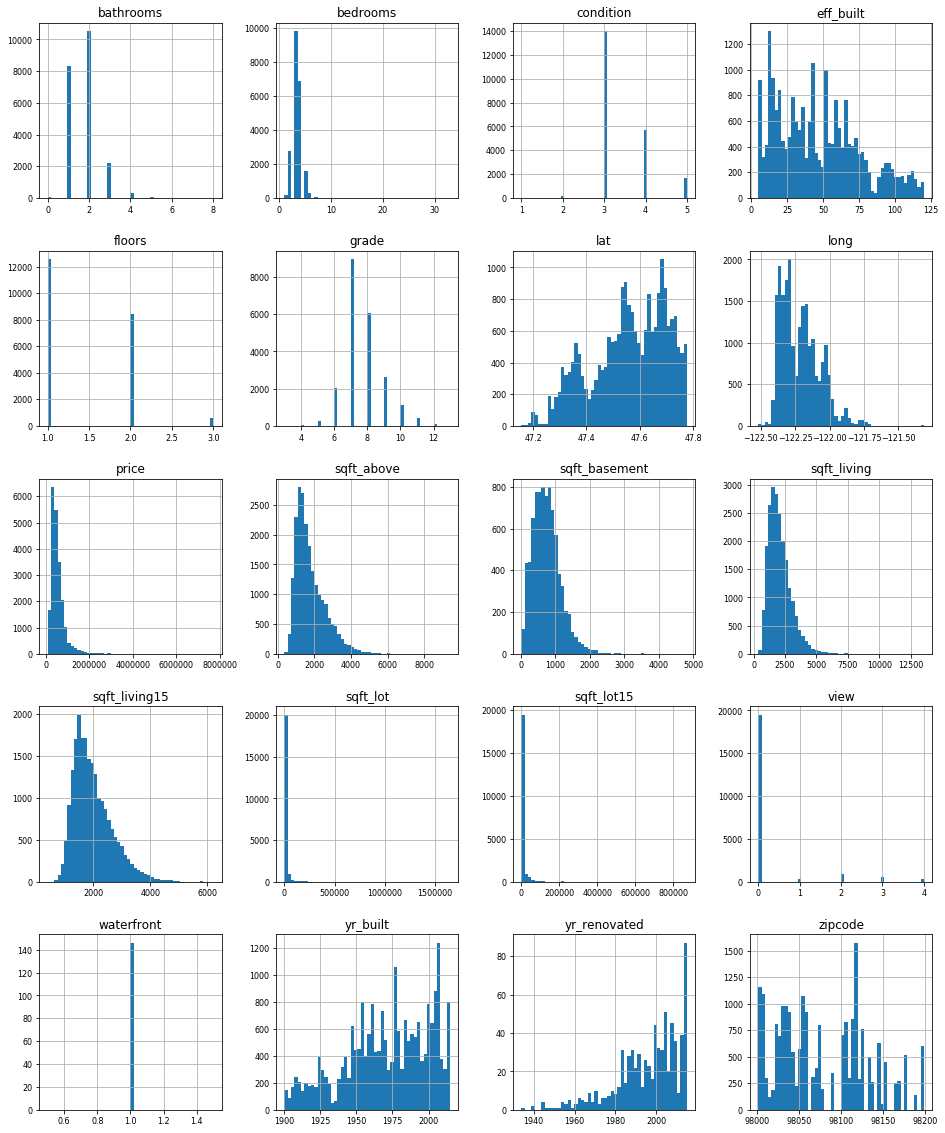

In [9]:
df_num.hist(figsize=(16,20), bins=50, xlabelsize=8, ylabelsize=8);

In [10]:
df_num_corr = df_num.corr()['price']
df_num_corr

price            1.000000
bedrooms         0.308787
bathrooms        0.510631
sqft_living      0.701917
sqft_lot         0.089876
floors           0.237264
waterfront            NaN
view             0.393497
condition        0.036056
grade            0.667951
sqft_above       0.605368
sqft_basement    0.408355
yr_built         0.053953
yr_renovated     0.125499
zipcode         -0.053402
lat              0.306692
long             0.022036
sqft_living15    0.585241
sqft_lot15       0.082845
eff_built       -0.097541
Name: price, dtype: float64

In [11]:
high_corr_vars = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
high_corr_vars

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.510631
Name: price, dtype: float64

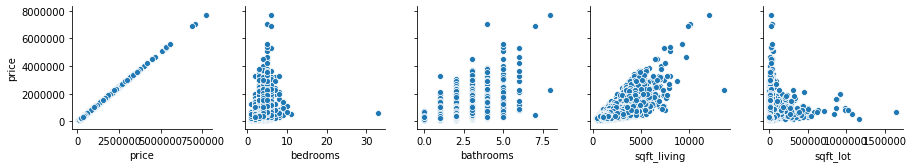

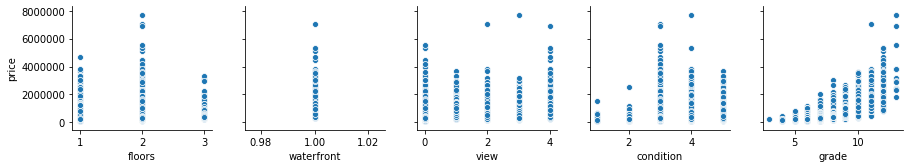

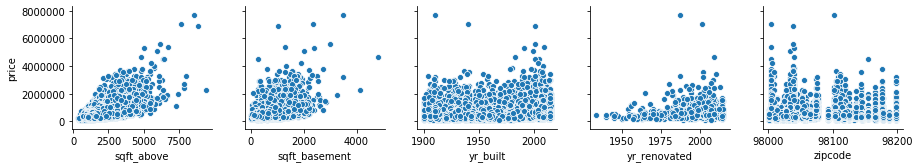

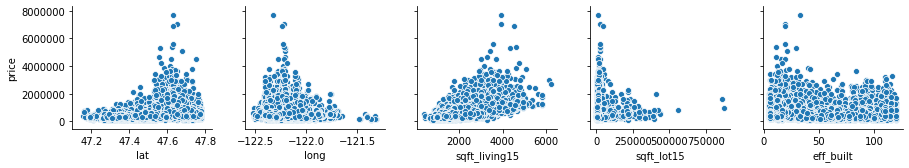

In [12]:
for i in range(0, len(df_num.columns),5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['price'])

In [13]:
bedroom_outlier = df.loc[(df['bedrooms'] >= 30)]
sqft_living_outlier = df.loc[(df['sqft_living'] >=12000)]

In [15]:
df_num = df_num.drop(bedroom_outlier.index)
df_num = df_num.drop(sqft_living_outlier.index)

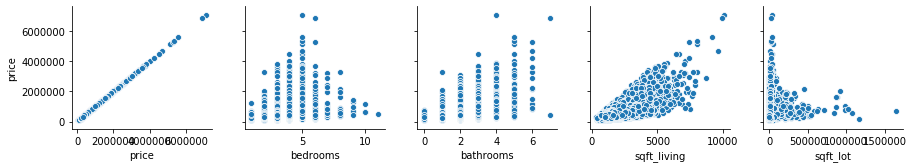

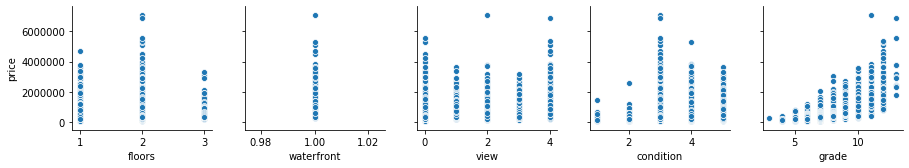

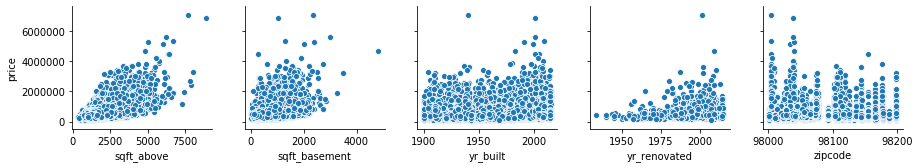

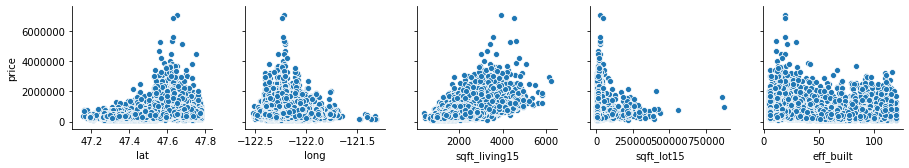

In [16]:
for i in range(0, len(df_num.columns),5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['price'])

In [17]:
features_to_analyse = list(high_corr_vars.index)[1:]
features_to_analyse

['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms']

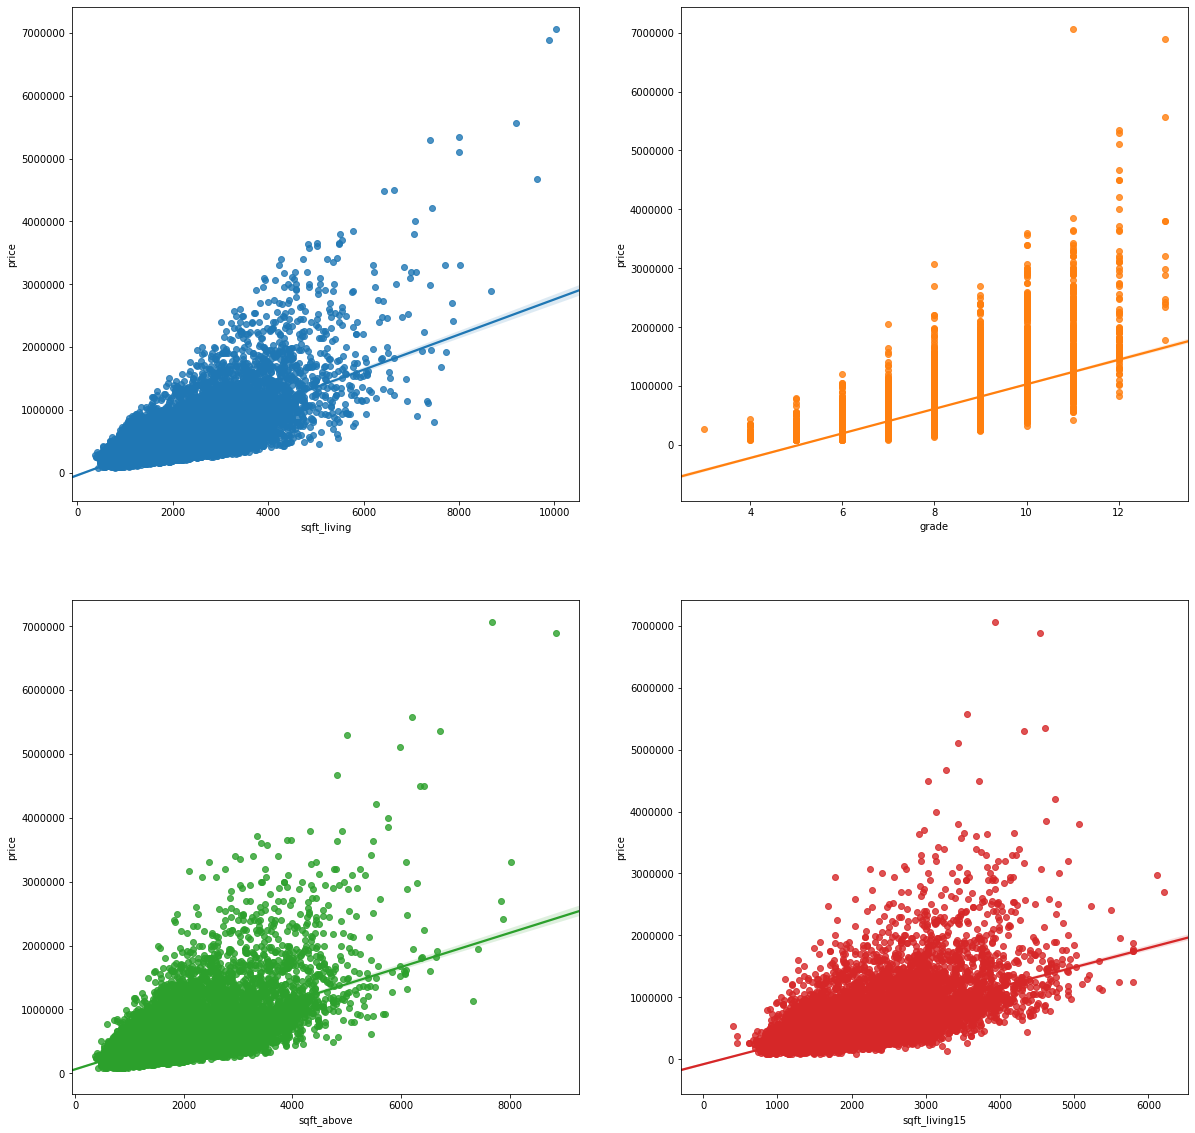

In [18]:
fig, ax = plt.subplots(2, 2, figsize = (20,20))

for i, ax in enumerate(fig.axes):
    sns.regplot(x=features_to_analyse[i], y='price', data=df_num, ax=ax)

In [19]:
df_categoricals = df[['has_basement','has_renovation','has_waterfront','bedrooms','bathrooms','floors','condition','price']]
cat_features_to_analyse = ['has_basement','has_renovation','has_waterfront','bedrooms','bathrooms','floors','condition','price']